## Observations and Insights 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "homework/Mouse_metadata.csv"
study_results_path = "homework/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = ["Mouse ID", "Mouse ID"], how = "left")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [77]:
# Checking the number of mice.
num_mice =len(combined_data['Mouse ID'].unique())
num_mice


249

In [78]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df = combined_data[combined_data['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

Object `pd.SEM` not found.


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


tumor_mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_std = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({
    "Tumor Mean": tumor_mean
    ,"Tumor Median": tumor_median
    ,"Tumor Variance": tumor_var
    ,"Tumor Deviation": tumor_std
    ,"Tumor SEM": tumor_sem
})
#summary_df
# Using the aggregation method, produce the same summary statistics in a single line
aggregated_data = clean_df.groupby(['Drug Regimen'])
aggregated_data_df = aggregated_data.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregated_data_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

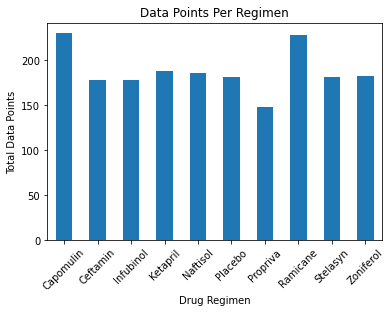

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_regimen = clean_df.groupby("Drug Regimen").count()['Tumor Volume (mm3)']
xaxis_df = pd.DataFrame(count_regimen)
regimen_chart = xaxis_df.plot.bar(rot = 45, legend = False)
plt.ylabel("Total Data Points")
plt.title("Data Points Per Regimen")
regimen_chart


Text(0, 0.5, 'Number of Data Points')

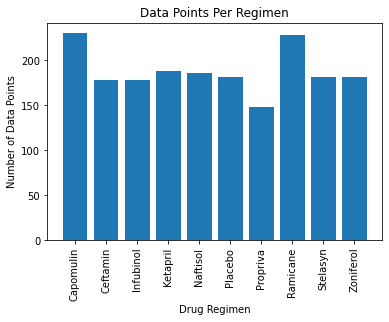

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(count_regimen))
tick_locations = [x for x in x_axis]
reset_df = xaxis_df.reset_index()
plt.bar(x_axis, xaxis_df["Tumor Volume (mm3)"], align = "center")
plt.xticks(tick_locations, reset_df['Drug Regimen'],rotation="vertical")
plt.title("Data Points Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


<ipython-input-10-5ff6e48602c3>:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_count, labels= updated_list, autopct="%1.1f%%", startangle = 45)


Text(0.5, 1.0, 'Male vs Female Mice Population')

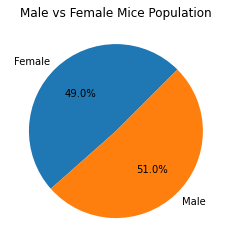

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby(['Sex']).count()
gender_label = [clean_df['Sex'].unique()]
updated_list = list(gender.index)
gender_count = [gender["Mouse ID"]]

plt.pie(gender_count, labels= updated_list, autopct="%1.1f%%", startangle = 45)
plt.title('Male vs Female Mice Population')



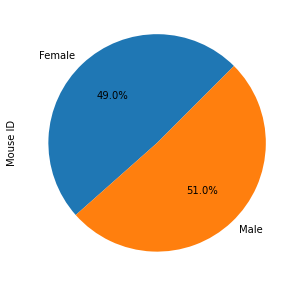

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender["Mouse ID"].plot.pie(y=gender_count, figsize=(5, 5), autopct="%1.1f%%",startangle=45)

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
study_data_df = pd.merge(max_tumor, clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
study_data_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for drug in treatment_list:
    final_vol_data = study_data_df.loc[study_data_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(final_vol_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(F"The IQR is {iqr}.")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = final_vol_data.loc[(final_vol_data < lower_bound) | (final_vol_data > upper_bound)]
print(F"The lower bound is {lower_bound}.")
print(F"The upper bound is {upper_bound}.")
print(F"{drug}'s potential outliers: {outliers}")

The IQR is 15.577752179999997.
The lower bound is 25.355449580000002.
The upper bound is 87.66645829999999.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


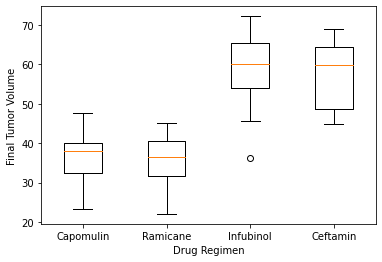

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.ylabel('Final Tumor Volume')
plt.xlabel('Drug Regimen')
plt.boxplot(tumor_vol_data, labels = treatment_list)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint in Days')

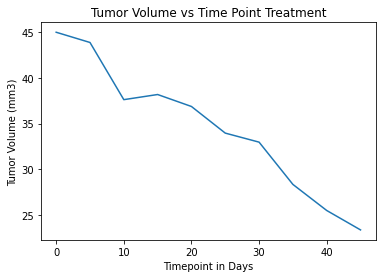

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = clean_df.loc[clean_df["Mouse ID"] == "s185",:]
x_axis = capomulin_data["Timepoint"]
tumor_size = capomulin_data["Tumor Volume (mm3)"]
plt.title("Tumor Volume vs Time Point Treatment")
plt.plot(x_axis,tumor_size)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint in Days')


Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight')

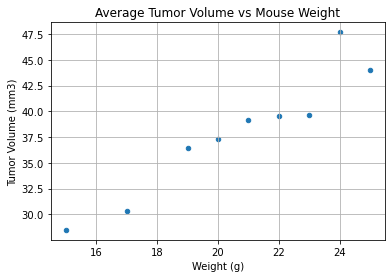

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data_2 = study_data_df.loc[study_data_df["Drug Regimen"].isin(["Capomulin"])]
scatter_plot_df = capomulin_data_2[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reset_df = scatter_plot_df.reset_index()
avg_tumor_v_weight = reset_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
avg_tumor_v_weight_df = pd.DataFrame(avg_tumor_v_weight).reset_index()
avg_tumor_v_weight_df.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', grid = True)
plt.title('Average Tumor Volume vs Mouse Weight')


## Correlation and Regression

The r-squared is: 0.9032375619522788
0.9503881112220831


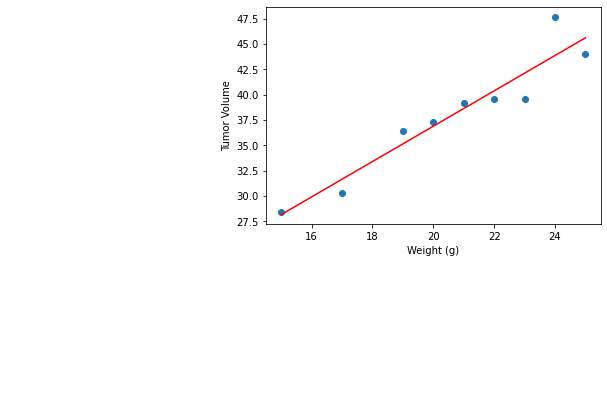

In [96]:
# Calculate the correlation coefficient and linear regression model 
x_value = avg_tumor_v_weight_df["Weight (g)"]
y_value = avg_tumor_v_weight_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
correlation = st.pearsonr(x_value,y_value)[0]
print(correlation)
# for mouse weight and average tumor volume for the Capomulin regimen
